# Consider only the below columns and prepare a prediction model for predicting Price.

## ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ToyotaCorolla.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 679: invalid start byte

In [3]:
df = pd.read_csv("ToyotaCorolla.csv", encoding_errors = 'ignore')

In [5]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

Price         -- Offer Price in EUROs   
Age_08_04     -- Age in months as in August 2004	   
KM            -- Accumulated Kilometers on odometer   
HP            -- Horse Power   
cc            -- Cylinder Volume in cubic centimeters   
Doors         -- Number of doors   
Gears         -- Number of gear positions   
Quarterly_Tax -- Quarterly road tax in EUROs   
Weight        -- Weight in Kilograms   

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


There are no NA values in any of the features

In [16]:
df.rename(columns = {'Age_08_04':'Age', 'Quarterly_Tax':'Tax'}, inplace = True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_11280\970539445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Age_08_04':'Age', 'Quarterly_Tax':'Tax'}, inplace = True)


In [17]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Doors and Gears are categorical features

In [11]:
df.Price.value_counts()

8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: Price, Length: 236, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

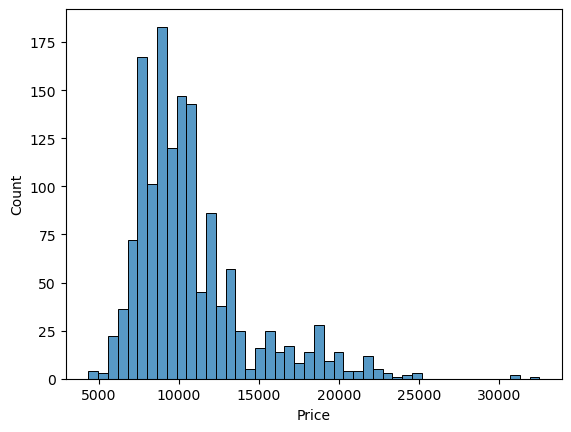

In [12]:
sns.histplot(df, x = 'Price')

In [19]:
df.Age.value_counts()

68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: Age, Length: 77, dtype: int64

In [62]:
a = np.arange(81)
b = np.power(a, 1.1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_11280\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

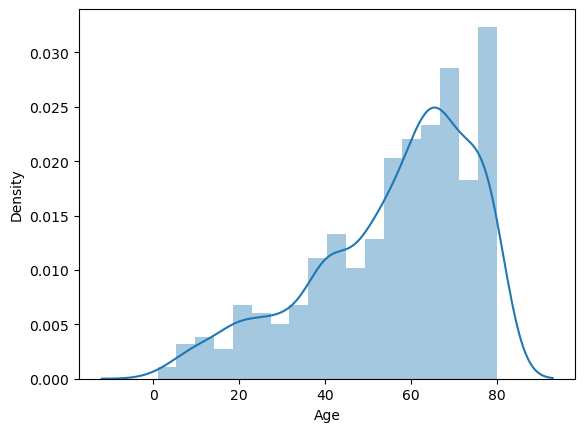

In [63]:
sns.distplot(df.Age)

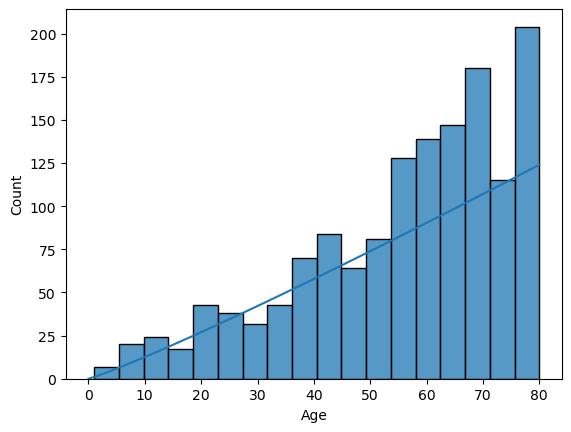

In [64]:
sns.histplot(df, x = 'Age')
plt.plot(a,b)

Looks like a linear, or a slightly exponential curve

In [22]:
df.KM.value_counts()

36000    9
1        8
43000    7
59000    7
75000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: KM, Length: 1263, dtype: int64

<Axes: xlabel='KM', ylabel='Count'>

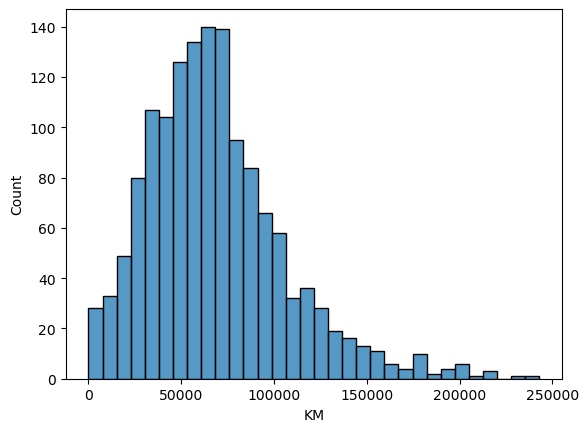

In [23]:
sns.histplot(df, x = 'KM')

In [25]:
df.HP.value_counts()

110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64

There are only 12 values for HP, so it can be considered a categorical feature

In [28]:
df.cc.value_counts()

1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64

There are only 13 values for cc, so it can also be considered a categorical feature

<Axes: xlabel='cc', ylabel='Count'>

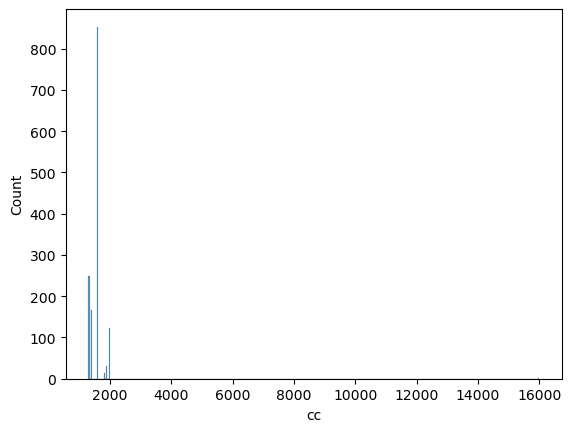

In [30]:
sns.histplot(df, x = 'cc')

In [31]:
df.Doors.value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

Definitely, a categorical variable

In [34]:
df.Gears.value_counts()

5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64

Also, a categorical variable

In [37]:
df.Tax.value_counts()

85     613
69     559
185     96
19      72
100     19
234     19
210     18
64      18
197     14
283      3
72       3
163      1
40       1
Name: Tax, dtype: int64

Only has 13 unique value, so can be considered a categorical variable

In [40]:
df.Weight.value_counts()

1075    192
1050    168
1015    117
1035    106
1070     89
1025     70
1065     51
1080     47
1055     43
1060     40
1085     40
1100     40
1115     39
1110     38
1040     35
1135     33
1105     31
1045     31
1130     29
1030     24
1000     17
1120     17
1140     16
1090     10
1114     10
1020      9
1185      9
1165      8
1150      7
1255      7
1180      5
1260      5
1170      4
1095      4
1480      4
1205      4
1010      4
1270      3
1320      3
1119      3
1245      3
1195      2
1275      2
1155      2
1160      1
1109      1
1079      1
1172      1
1094      1
1084      1
1103      1
1078      1
1280      1
1265      1
1125      1
1067      1
1615      1
1121      1
1083      1
Name: Weight, dtype: int64

Has 59 unique values, can be considered categorical considering the total number of records in the dataframe

<Axes: xlabel='Weight', ylabel='Count'>

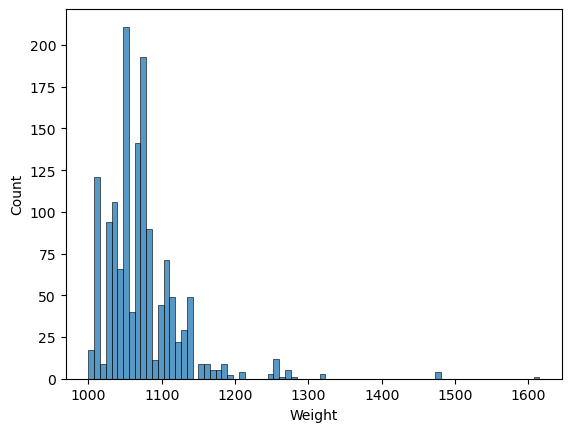

In [41]:
sns.histplot(df, x = 'Weight')

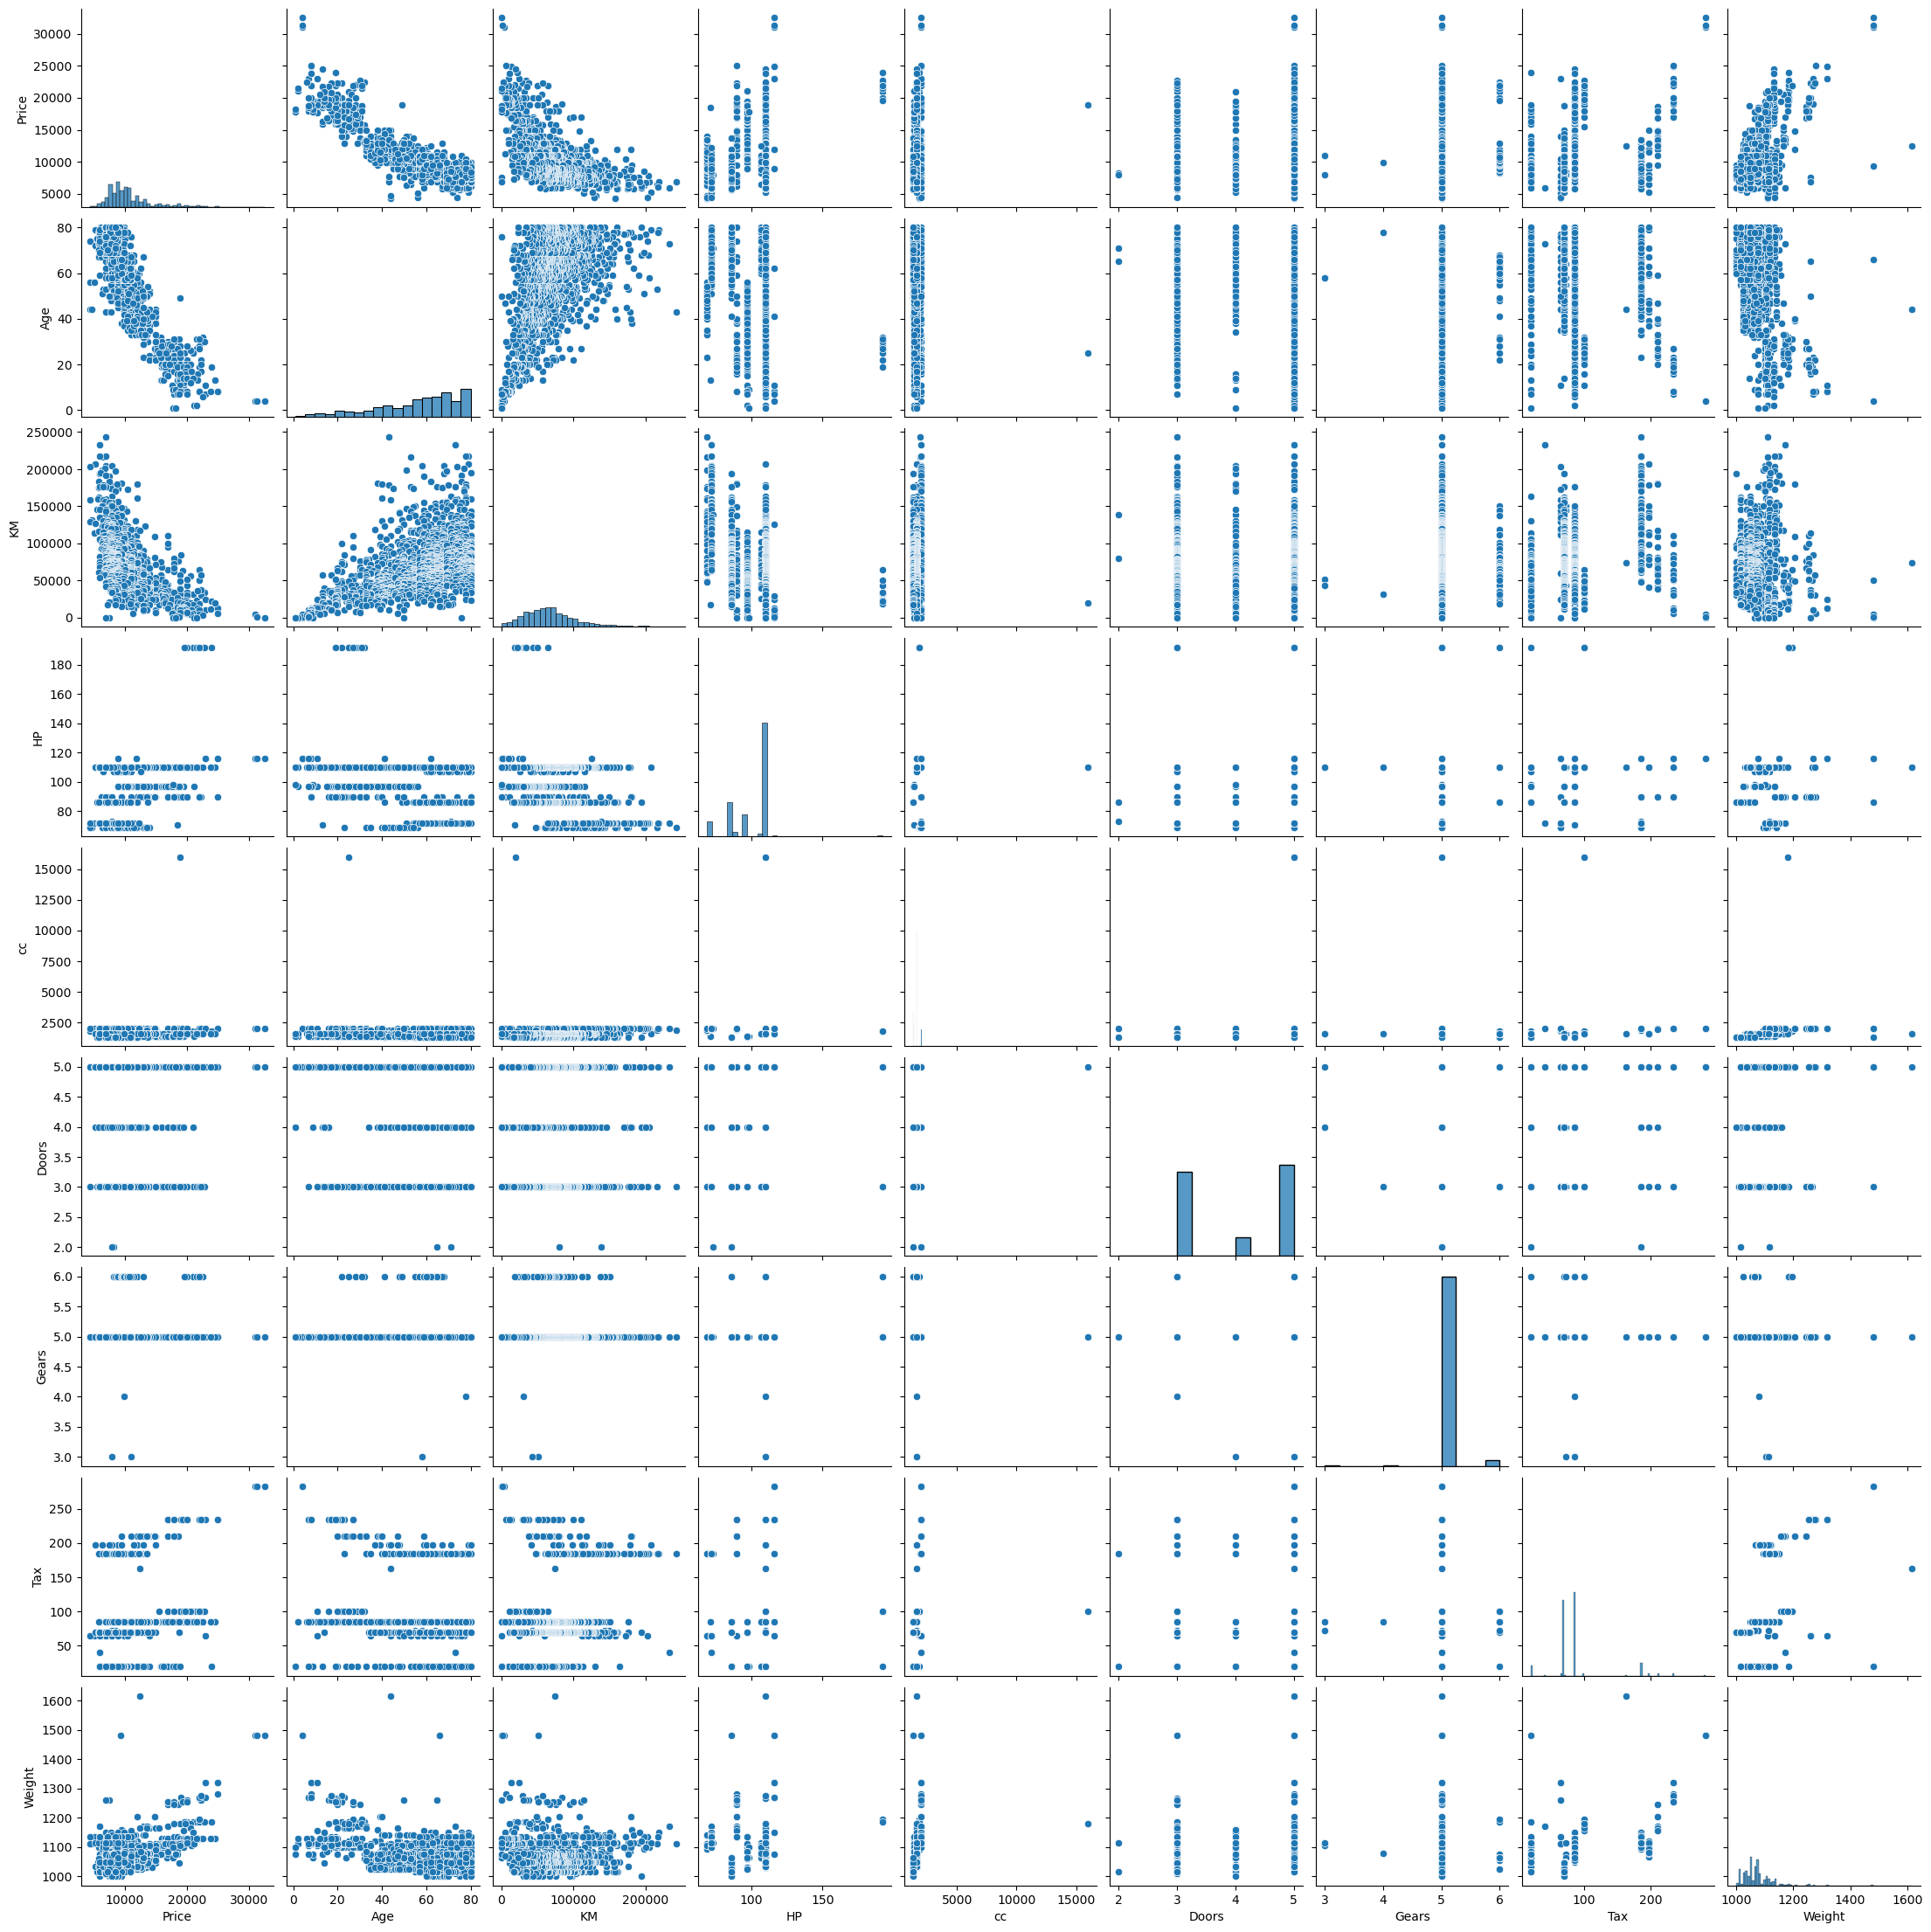

In [42]:
sns.pairplot(df)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


Price -> Dependent variable  
Age -> Continuous; linear  
KM -> Right skewed; standardize  
HP -> categorical; 12  
CC -> categorical; 13  
Doors -> categorical  
Gears -> categorical  
Tax -> categorical; 13  
Weight -> categorical, 59; standardize if continuous  

<Axes: >

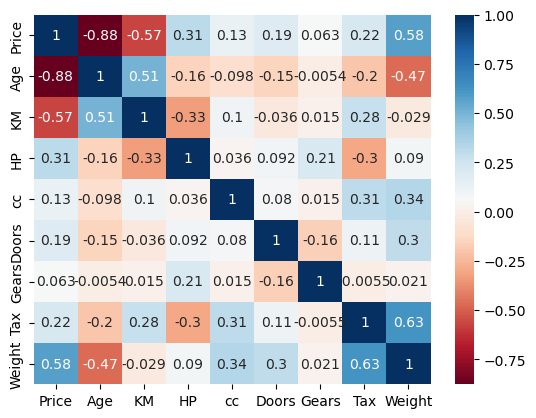

In [75]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu')

Age, KM are negatively correlated; Weight is somewhat positively correlated

In [65]:
model = LinearRegression()

In [83]:
x = df.drop(columns = ['Price'])
y = df.Price

In [69]:
model.fit(x, y)

LinearRegression()

In [71]:
r2 = {}

In [73]:
r2['raw'] = model.score(x, y)
r2['raw']

0.8637627463428192

km, weight standardized

In [76]:
from sklearn.preprocessing import StandardScaler

In [84]:
x2 = x.copy()

In [85]:
x2.loc[:,['KM', 'Weight']] = StandardScaler().fit_transform(x2.loc[:,['KM', 'Weight']])

In [88]:
model.fit(x2, y)

LinearRegression()

In [90]:
r2['km & weight standardized'] = model.score(x2, y)
r2['km & weight standardized']

0.8637627463428191

Standardizing km, and weight did not change the R squared value

Let's try one hot encoding Doors and Gears

In [100]:
x = pd.get_dummies(x, columns = ['Doors', 'Gears'])

In [101]:
x

,Age,KM,HP,cc,Tax,Weight,Doors_2,Doors_3,Doors_4,Doors_5,Gears_3,Gears_4,Gears_5,Gears_6
0,23,46986,90,2000,210,1165,0,1,0,0,0,0,1,0
1,23,72937,90,2000,210,1165,0,1,0,0,0,0,1,0
2,24,41711,90,2000,210,1165,0,1,0,0,0,0,1,0
3,26,48000,90,2000,210,1165,0,1,0,0,0,0,1,0
4,30,38500,90,2000,210,1170,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,69,1025,0,1,0,0,0,0,1,0
1432,72,19000,86,1300,69,1015,0,1,0,0,0,0,1,0
1433,71,17016,86,1300,69,1015,0,1,0,0,0,0,1,0
1434,70,16916,86,1300,69,1015,0,1,0,0,0,0,1,0


In [102]:
model.fit(x,y)

LinearRegression()

In [104]:
r2['Doors, Gears 1HotEncoded'] = model.score(x,y)
r2['Doors, Gears 1HotEncoded']

0.8642679817915724

Let's try one hot encoding HP, cc, Tax

In [106]:
x = pd.get_dummies(x, columns = ['HP', 'cc', 'Tax'])

In [107]:
model.fit(x,y)

LinearRegression()

In [108]:
r2['Doors, Gears, HP, cc, Tax 1HotEncoded'] = model.score(x,y)
r2['Doors, Gears, HP, cc, Tax 1HotEncoded']

0.8991104297725001

This improved R Squared score by 3.5%

Now, lets try one hot encoding Weight 

In [109]:
x = pd.get_dummies(x, columns = ['Weight'])

In [110]:
model.fit(x,y)

LinearRegression()

In [111]:
r2['Doors, Gears, HP, cc, Tax, Weight 1HotEncoded'] = model.score(x,y)
r2['Doors, Gears, HP, cc, Tax, Weight 1HotEncoded']

0.9239472993153666

This improved R Squared score by another 2.4%

In [113]:
pd.Series(r2)

raw                                              0.863763
km & weight standardized                         0.863763
Doors, Gears 1HotEncoded                         0.864268
Doors, Gears, HP, cc, Tax 1HotEncoded            0.899110
Doors, Gears, HP, cc, Tax, Weight 1HotEncoded    0.923947
dtype: float64

# One Hot Encoding all categorical features gave the best score of 0.923947